In [18]:
import numpy as np
import pandas as pd
import pickle
import re
from collections import Counter

In [19]:
df = pd.read_pickle('Subset.pkl')

In [20]:
df.head()

,Title,Body,Tag
0,Make a dynamic GridView to fit screen android,<p>I have a GridView that can contain NxM Cust...,android
1,image/video processing options,<p>I have a small 12 volt board camera that is...,python
2,Error while using HttpConnection,<p><strong>QUESTION</strong></p>\n\n<p>I am tr...,java
3,Marker icon not showing up but is clickable,<p>I've got the following code which gets info...,android
4,Swift - Trouble with SKAction sequence,<p>I'm trying to move my background image down...,ios


In [21]:
df.shape

(22164, 3)

In [22]:
df['text'] = df['Title']+df['Body'] #combining the title with body

In [23]:
df.head()

,Title,Body,Tag,text
0,Make a dynamic GridView to fit screen android,<p>I have a GridView that can contain NxM Cust...,android,Make a dynamic GridView to fit screen android<...
1,image/video processing options,<p>I have a small 12 volt board camera that is...,python,image/video processing options<p>I have a smal...
2,Error while using HttpConnection,<p><strong>QUESTION</strong></p>\n\n<p>I am tr...,java,Error while using HttpConnection<p><strong>QUE...
3,Marker icon not showing up but is clickable,<p>I've got the following code which gets info...,android,Marker icon not showing up but is clickable<p>...
4,Swift - Trouble with SKAction sequence,<p>I'm trying to move my background image down...,ios,Swift - Trouble with SKAction sequence<p>I'm t...


In [24]:
df.drop(columns=['Title','Body'],inplace=True)

In [25]:
df.head()

,Tag,text
0,android,Make a dynamic GridView to fit screen android<...
1,python,image/video processing options<p>I have a smal...
2,java,Error while using HttpConnection<p><strong>QUE...
3,android,Marker icon not showing up but is clickable<p>...
4,ios,Swift - Trouble with SKAction sequence<p>I'm t...


In [29]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
s = set(stopwords.words('english'))

In [31]:
#now the data preprocessing part
def clean_text(text):
    global EMPTY
    EMPTY = ' '
    ps = PorterStemmer()
    text = re.sub('<[^>]+>',EMPTY,text)
    text = re.sub('[\.\,\:\"\'\/\+\@\=\;\&\*\(\)]',EMPTY,text)
    text = re.sub('[0-9]+',EMPTY,text)
    new_text = ''
    for word in text.strip().split():
        if word not in s:
            new_text = new_text+ps.stem(word)+' '
    return new_text.strip()

In [32]:
df['text'] = df['text'].apply(clean_text).str.lower()

In [34]:
df['text'][1]

'imag video process option i small volt board camera place insid bee hive it lit infrar led bee see infrar it send simpl ntsc signal along wire littl tv monitor i thi allow see insid hive without disturb bee the queen dot back obviou frame i would like someth process signal regist queen frame thi accur count instead process video would fine take imag everi second see certain amount bright indic queen frame thi use sinc help bee keeper know queen aliv appear number day could mean someth wrong i would love hear suggest inexpens way process video especi low power consumpt raspberri pi? arduino? camera exampl sampl video queen frame'

In [35]:
tag = Counter(df['Tag']).most_common()

In [36]:
tag

[('javascript', 3272),
 ('java', 3115),
 ('c#', 2723),
 ('php', 2680),
 ('android', 2498),
 ('jquery', 2099),
 ('python', 1726),
 ('html', 1527),
 ('c++', 1298),
 ('ios', 1226)]

In [37]:
tag = dict(tag)

In [38]:
tag

{'javascript': 3272,
 'java': 3115,
 'c#': 2723,
 'php': 2680,
 'android': 2498,
 'jquery': 2099,
 'python': 1726,
 'html': 1527,
 'c++': 1298,
 'ios': 1226}

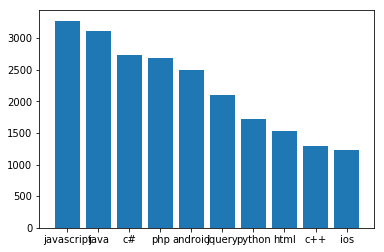

In [40]:
import matplotlib.pyplot as plt
plt.bar(*zip(*tag.items()))
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [42]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],df['Tag'],random_state=37,test_size=0.2,shuffle=True)

In [44]:
x_train

17224    chang sourc code onlin i tri allow client chan...
11173    pars json data use php i want pars formattedam...
15503    scan detect object color imag i develop softwa...
1058     how access properti return jqueri jqxhr object...
9665     pass non static member function paramet i lot ...
8809     error sqlite queri android i need find string ...
9394     android applic launch consol is possibl make c...
16123    mouseup event drag i link mousedown mouseup ha...
6382     error start activ servic android i receiv list...
21177    how emb googlebook search api view? i code goo...
2159     navig view checkablebehavior none work latest ...
17672    how make digit round? i want number - - i want...
7070     continu write data differ class text file i di...
3077     titanium android applic crash first open kitka...
13089    supers full-screen slider vertic thumb-tray i ...
2195     algorithm compar d signal data acceleromet i w...
3730     set imag path createtrackbar i work opencv pro.

In [45]:
vectorizer = TfidfVectorizer(sublinear_tf=True,max_df=0.5,stop_words='english')

In [68]:
from time import time
t0 = time()
x_train_vector = vectorizer.fit_transform(x_train)
duration = time()-t0
print('Time taken: %fs' %(duration))

Time taken: 1.806134s


In [69]:
x_train_vector

<17731x110688 sparse matrix of type '<class 'numpy.float64'>'
	with 985428 stored elements in Compressed Sparse Row format>

In [70]:
x_test_vector = vectorizer.transform(x_test)

In [71]:
feature_name = vectorizer.get_feature_names()
if feature_name:
    feature_name = np.asarray(feature_name)

In [72]:
catagories = df.Tag.unique()

In [73]:
catagories

array(['android', 'python', 'java', 'ios', 'c#', 'jquery', 'javascript',
       'c++', 'html', 'php'], dtype=object)

In [79]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
def training(clf):
    print('='*80)
    print('Classifier Name: ')
    print(clf)
    t0 = time()
    clf.fit(x_train_vector,y_train)
    train_time = time()-t0
    print('Training time: %f'%(train_time))
    t0 = time()
    pred = clf.predict(x_test_vector)
    print('Test time: %f'%(time()-t0))
    print('Accuracy: %f',metrics.accuracy_score(y_test,pred))
    print(metrics.classification_report(y_test, pred,target_names=catagories))
    mat = metrics.confusion_matrix(y_test, pred)
    plt.matshow(mat)
    plt.show()

In [80]:
x_train_vector.shape

(17731, 110688)

In [81]:
x_test_vector.shape

(4433, 110688)

Naive Bayes:
Classifier Name: 
MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
Training time: 0.120791
Test time: 0.006818
Accuracy: %f 0.6548612677644936
              precision    recall  f1-score   support

     android       0.76      0.71      0.74       508
      python       0.83      0.77      0.80       543
        java       0.95      0.56      0.71       238
         ios       0.56      0.21      0.31       284
          c#       0.97      0.58      0.73       245
      jquery       0.64      0.78      0.70       658
  javascript       0.40      0.84      0.55       637
         c++       0.63      0.22      0.32       429
        html       0.75      0.80      0.77       527
         php       0.96      0.63      0.76       364

   micro avg       0.65      0.65      0.65      4433
   macro avg       0.75      0.61      0.64      4433
weighted avg       0.71      0.65      0.65      4433



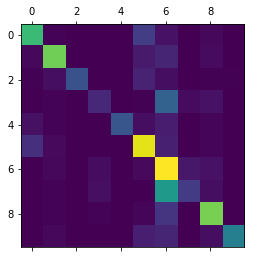

Classifier Name: 
BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)
Training time: 0.115736
Test time: 0.040146
Accuracy: %f 0.6803519061583577
              precision    recall  f1-score   support

     android       0.81      0.60      0.69       508
      python       0.76      0.82      0.79       543
        java       0.76      0.72      0.74       238
         ios       0.48      0.36      0.41       284
          c#       0.92      0.80      0.85       245
      jquery       0.78      0.65      0.71       658
  javascript       0.47      0.68      0.55       637
         c++       0.53      0.40      0.45       429
        html       0.74      0.84      0.79       527
         php       0.77      0.87      0.82       364

   micro avg       0.68      0.68      0.68      4433
   macro avg       0.70      0.67      0.68      4433
weighted avg       0.69      0.68      0.68      4433



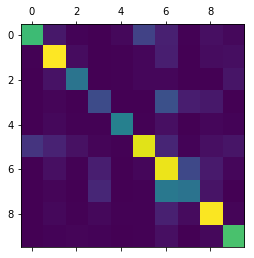

In [82]:
#Naive Bayes

print('Naive Bayes:')

clf1 = MultinomialNB(alpha=0.1)
clf2 = BernoulliNB(alpha=0.1)
training(clf1)
training(clf2)

Ridge Classifier: 
Classifier Name: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)


/home/debadri/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:332: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


Training time: 3.333447
Test time: 0.010618
Accuracy: %f 0.7653958944281525
              precision    recall  f1-score   support

     android       0.79      0.86      0.82       508
      python       0.80      0.86      0.83       543
        java       0.89      0.78      0.83       238
         ios       0.54      0.44      0.49       284
          c#       0.93      0.87      0.90       245
      jquery       0.82      0.79      0.80       658
  javascript       0.60      0.67      0.64       637
         c++       0.59      0.52      0.55       429
        html       0.81      0.89      0.85       527
         php       0.96      0.91      0.94       364

   micro avg       0.77      0.77      0.77      4433
   macro avg       0.78      0.76      0.76      4433
weighted avg       0.77      0.77      0.76      4433



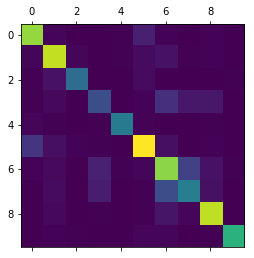

In [83]:
from sklearn.linear_model import RidgeClassifier

#trying with RidgeClassifier
print('Ridge Classifier: ')
clf3 = RidgeClassifier(tol=1e-2, solver="lsqr")
training(clf3)

In [85]:
x_test_vector[10]

<1x110688 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [93]:
clf1.predict(x_test_vector[4])

array(['php'], dtype='<U10')

In [91]:
y_test

2141         python
16427            c#
10591            c#
12270        jquery
3008            php
6260         python
5318         jquery
2389         python
14092       android
9876           html
22005        python
11576    javascript
4193           java
27       javascript
8629           java
12240            c#
7541        android
2881     javascript
22094        jquery
6032     javascript
4814           html
8708             c#
3153            c++
18026    javascript
19971          html
1328            ios
5708             c#
1662         jquery
19548        python
3441         python
            ...    
2799     javascript
16445            c#
16094    javascript
6989         python
6060           java
13500    javascript
1171     javascript
6979             c#
8654            php
21387            c#
15090    javascript
12735           ios
7813           java
3410        android
19713           php
14352        jquery
5254         jquery
5798           java
21760           c++


In [95]:
with open('Multinomial.pkl','wb') as myfile:
    pickle.dump(clf1,myfile)

Nearest Centroid: 
Classifier Name: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
Training time: 0.526993
Test time: 0.168034
Accuracy: %f 0.6866681705391383
              precision    recall  f1-score   support

     android       0.84      0.76      0.80       508
      python       0.56      0.84      0.67       543
        java       0.82      0.69      0.75       238
         ios       0.37      0.60      0.45       284
          c#       0.77      0.87      0.81       245
      jquery       0.81      0.68      0.74       658
  javascript       0.63      0.47      0.54       637
         c++       0.56      0.47      0.51       429
        html       0.81      0.76      0.78       527
         php       0.92      0.84      0.88       364

   micro avg       0.69      0.69      0.69      4433
   macro avg       0.71      0.70      0.69      4433
weighted avg       0.71      0.69      0.69      4433



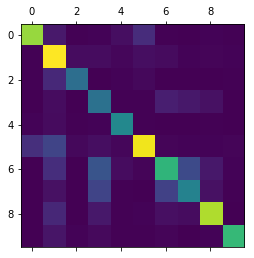

In [97]:
from sklearn.neighbors import NearestCentroid
clf4 = NearestCentroid()
print('Nearest Centroid: ')
training(clf4)

In [98]:
with open('NearestCentroid.pkl','wb') as myfile:
    pickle.dump(clf4,myfilefile)

In [99]:
with open('BernoulliNB.pkl','wb') as myfile:
    pickle.dump(clf2,myfile)

In [100]:
with open('Ridge.pkl','wb') as myfile:
    pickle.dump(clf3,myfile)